# Global Terrorism Dataset :
[Here](https://www.kaggle.com/START-UMD/gtd)

In [38]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
pd.plotting.register_matplotlib_converters()
%matplotlib inline
print("Setup Complete")
# Note: We can set the style by calling Seaborn's set() method 
sns.set()
from bokeh.palettes import Magma, Inferno, Plasma, Viridis, Cividis #color palette
from bokeh.palettes import BrBG, PiYG, RdGy, RdYlGn, YlGnBu
from bokeh.palettes import Viridis256, Cividis256, Turbo256
from bokeh.palettes import Category10, Category20, Category20b, Category20c

Setup Complete


In [39]:
df= pd.read_csv("globalterrorismdb_0718dist.csv")

c:\users\fatoo\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [40]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


Text(0.5, 0, 'Missing Values')

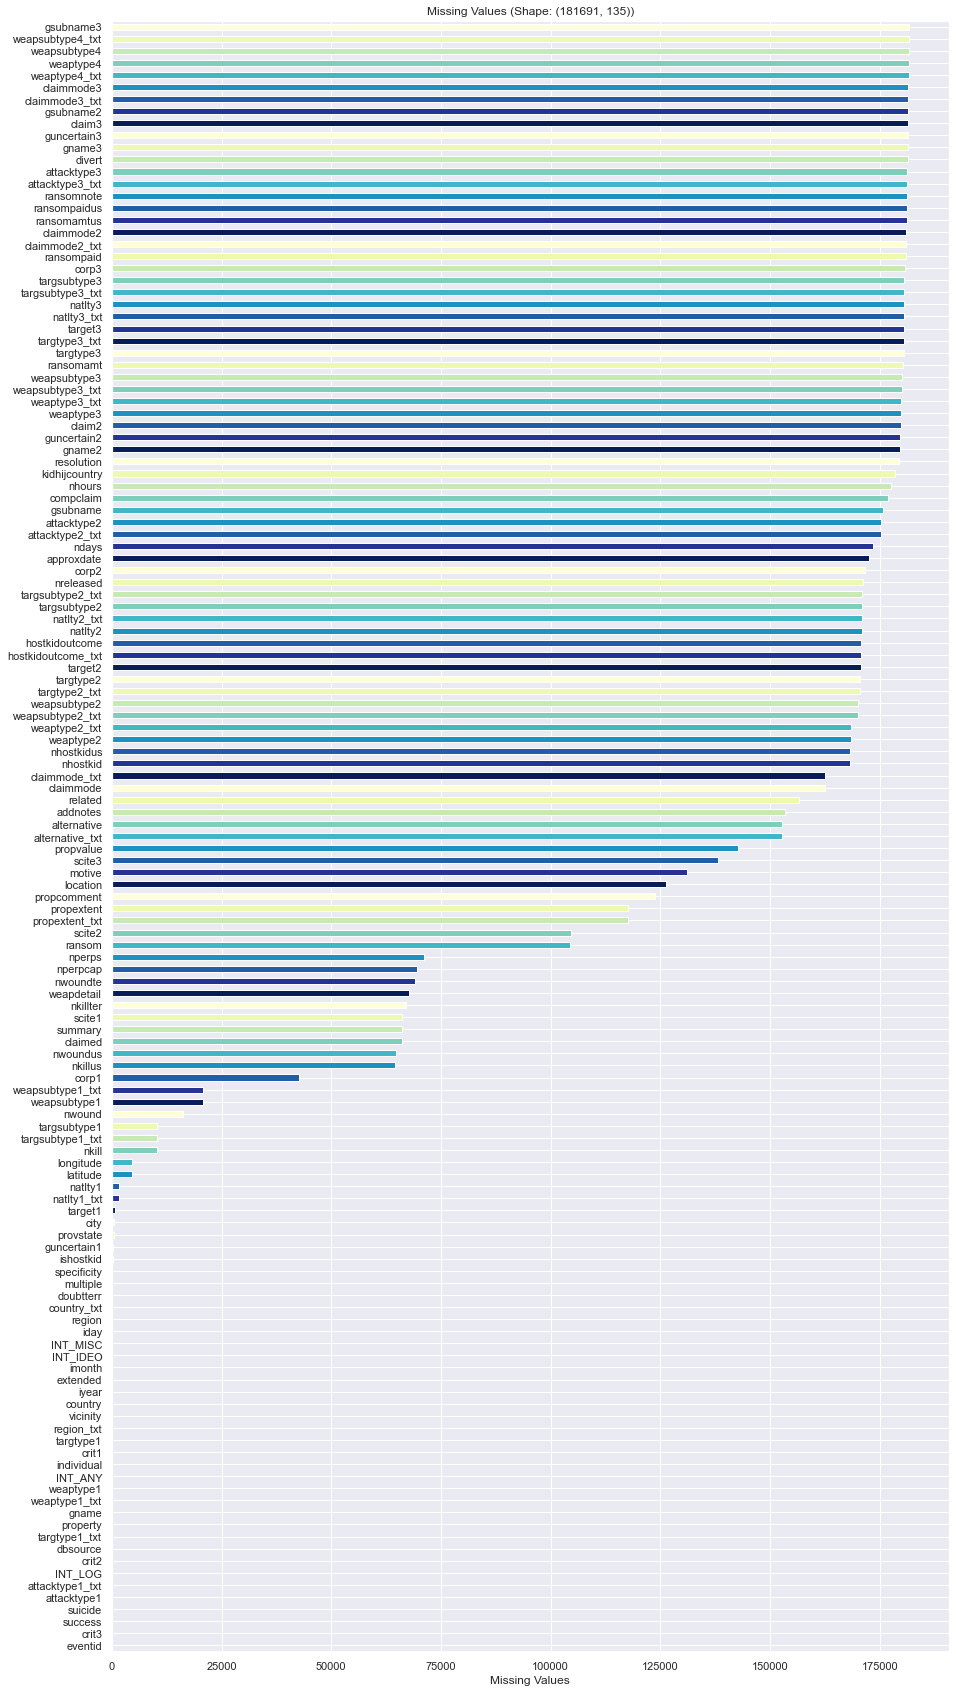

In [41]:
# Look at total NaN values per column graphically
df.isnull().sum().sort_values().plot(kind="barh", title="Missing Values (Shape: (181691, 135))",figsize=(15, 30),color =YlGnBu[9]);
plt.xlabel('Missing Values')

In [42]:
# year start from 1970
#Filter data to start 2002 
newdf = df[df['iyear']>=2002]
newdf

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
73556,200201010001,2002,1,1,NaN,0,NaN,153,Pakistan,6,...,NaN,"�Car bomb injures 12 in Pakistani city,� Agenc...","�Promise of talks tempers Kashmir stand-off,� ...",NaN,CETIS,-9,-9,0,-9,NaN
73557,200201010002,2002,1,1,NaN,0,NaN,92,India,6,...,NaN,�Woman shot dead by suspected militants in Kas...,NaN,NaN,CETIS,-9,-9,0,-9,NaN
73558,200201010003,2002,1,1,NaN,0,NaN,92,India,6,...,NaN,�Woman shot dead by suspected militants in Kas...,NaN,NaN,CETIS,-9,-9,0,-9,NaN
73559,200201010004,2002,1,1,NaN,0,NaN,93,Indonesia,5,...,This was one of two related attacks (cf. 20020...,"�Explosions hit Indonesian cities,� Deutsche P...",NaN,NaN,CETIS,-9,-9,0,-9,"200201010004, 200201010005"
73560,200201010005,2002,1,1,NaN,0,NaN,93,Indonesia,5,...,This was one of two related attacks (cf. 20020...,"�Explosions hit Indonesian cities,� Deutsche P...",NaN,NaN,CETIS,-9,-9,0,-9,"200201010005, 200201010004"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


# Cleaning

In [43]:
newdf.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.081350e+05,108135.000000,108135.000000,108135.000000,108135.000000,108135.000000,108135.000000,107363.000000,107363.000000,108129.000000,...,5.620000e+02,4.670000e+02,5.020000e+02,452.000000,8752.000000,8563.000000,108135.000000,108135.000000,108135.000000,108135.000000
mean,2.012718e+11,2012.651380,6.454090,15.588126,0.059694,121.896167,8.061553,26.494619,52.191906,1.461597,...,2.870273e+06,6.957371e+05,6.883323e+05,41.619469,4.872601,-33.916501,-5.073075,-4.969150,0.065492,-4.606538
std,3.588756e+08,3.588794,3.384981,8.815556,0.236920,90.792407,2.343554,13.053495,34.839395,0.913125,...,1.624234e+07,7.767637e+06,1.231767e+07,664.818576,1.998255,67.097061,4.494784,4.621849,0.337103,4.690454
min,2.002010e+11,2002.000000,1.000000,0.000000,0.000000,4.000000,1.000000,-42.884049,-124.224996,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,2.011031e+11,2011.000000,4.000000,8.000000,0.000000,92.000000,6.000000,16.182500,40.502071,1.000000,...,-9.900000e+01,0.000000e+00,-9.900000e+01,0.000000,4.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.014022e+11,2014.000000,6.000000,15.000000,0.000000,95.000000,9.000000,32.503680,44.718525,1.000000,...,1.618336e+04,0.000000e+00,-9.900000e+01,0.000000,5.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000
75%,2.015103e+11,2015.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.208416,70.780307,1.000000,...,2.452000e+05,0.000000e+00,0.000000e+00,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,65.825119,176.986756,5.000000,...,2.000000e+08,1.320000e+08,2.750000e+08,10000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
newdf.shape

(108135, 135)

In [45]:
newdf.isnull().sum()

eventid           0
iyear             0
imonth            0
iday              0
approxdate    99020
              ...  
INT_LOG           0
INT_IDEO          0
INT_MISC          0
INT_ANY           0
related       91270
Length: 135, dtype: int64

#### As we can see there are some null values that we need deal with 
##### First: Get rid of all columns that has nulls more than 70%

In [46]:
newdf.dropna(axis=1, thresh = int(0.7*newdf.shape[0]), inplace=True)

<ipython-input-46-faf3fb5c5427>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf.dropna(axis=1, thresh = int(0.7*newdf.shape[0]), inplace=True)


In [47]:
newdf.drop_duplicates()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
73556,200201010001,2002,1,1,0,153,Pakistan,6,South Asia,Sindh,...,0.0,0.0,1,0.0,"�Car bomb injures 12 in Pakistani city,� Agenc...",CETIS,-9,-9,0,-9
73557,200201010002,2002,1,1,0,92,India,6,South Asia,Jammu and Kashmir,...,0.0,0.0,-9,0.0,�Woman shot dead by suspected militants in Kas...,CETIS,-9,-9,0,-9
73558,200201010003,2002,1,1,0,92,India,6,South Asia,Jammu and Kashmir,...,0.0,0.0,-9,0.0,�Woman shot dead by suspected militants in Kas...,CETIS,-9,-9,0,-9
73559,200201010004,2002,1,1,0,93,Indonesia,5,Southeast Asia,Sulawesi (Province),...,0.0,0.0,1,0.0,"�Explosions hit Indonesian cities,� Deutsche P...",CETIS,-9,-9,0,-9
73560,200201010005,2002,1,1,0,93,Indonesia,5,Southeast Asia,Jakarta (Capital City District),...,0.0,0.0,1,0.0,"�Explosions hit Indonesian cities,� Deutsche P...",CETIS,-9,-9,0,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,...,0.0,0.0,-9,0.0,"""Somalia: Al-Shabaab Militants Attack Army Che...",START Primary Collection,0,0,0,0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,...,0.0,0.0,1,0.0,"""Putin's 'victory' in Syria has turned into a ...",START Primary Collection,-9,-9,1,1
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,...,0.0,0.0,1,0.0,"""Maguindanao clashes trap tribe members,"" Phil...",START Primary Collection,0,0,0,0
181689,201712310031,2017,12,31,0,92,India,6,South Asia,Manipur,...,0.0,0.0,-9,0.0,"""Trader escapes grenade attack in Imphal,"" Bus...",START Primary Collection,-9,-9,0,-9


Text(0.5, 0, 'Missing Values')

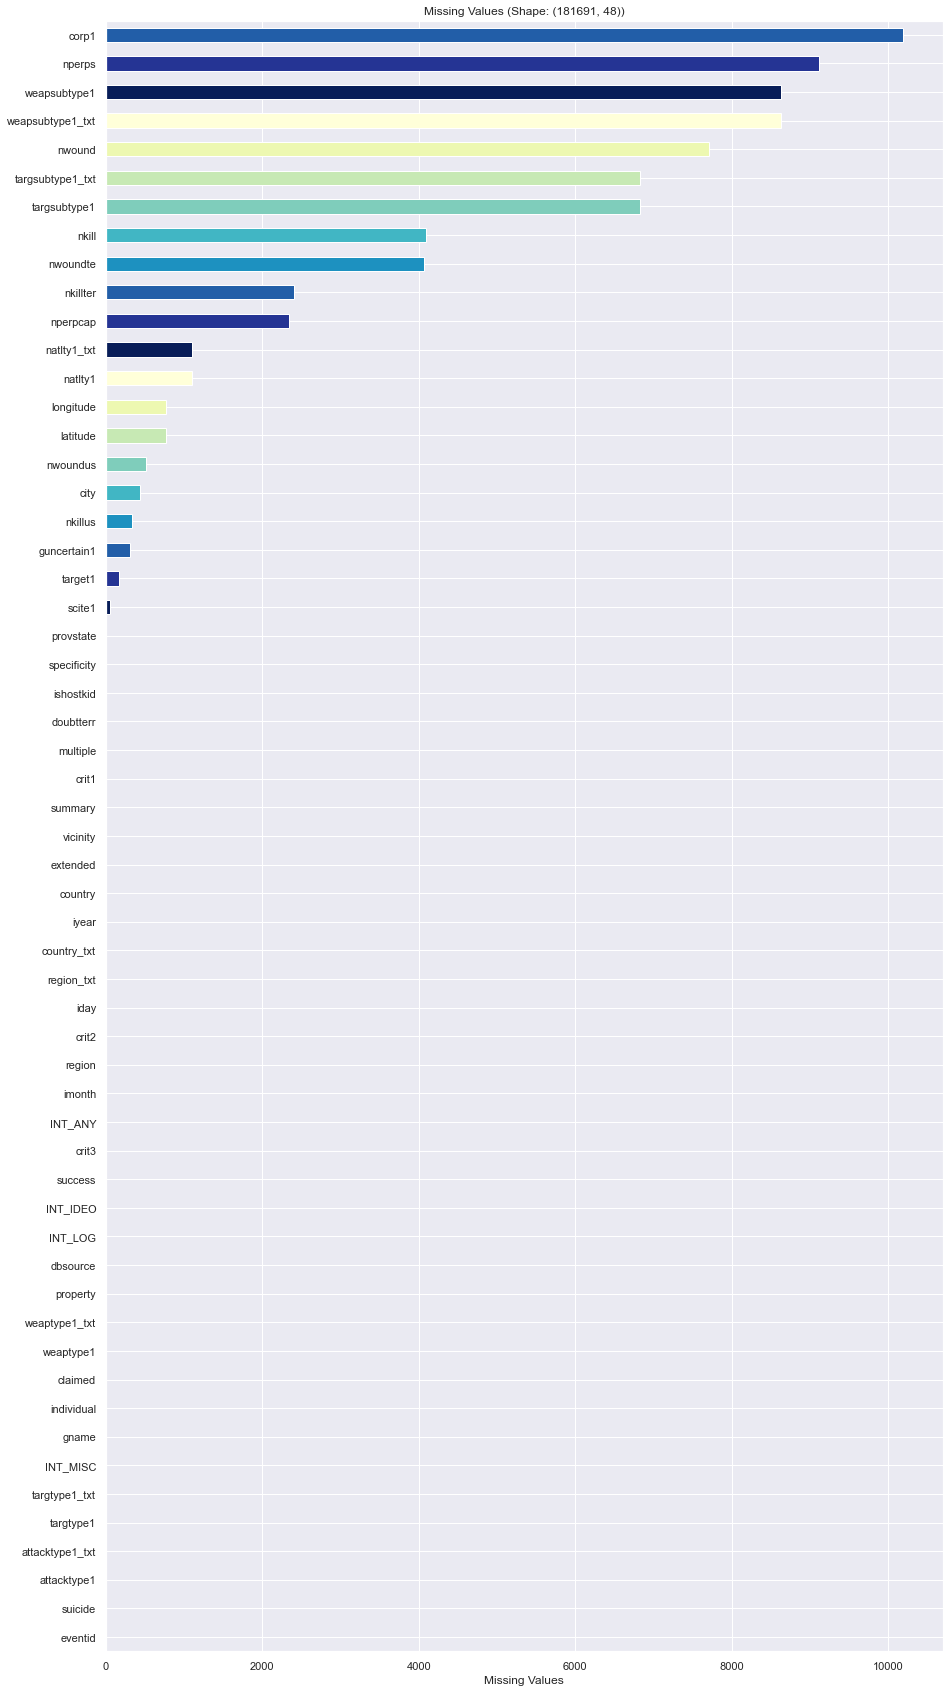

In [48]:
# Look at total NaN values per column graphically
newdf.isnull().sum().sort_values().plot(kind="barh", title="Missing Values (Shape: (181691, 48))",figsize=(15, 30),color =YlGnBu[9]);
plt.xlabel('Missing Values')

### Explore the remaining Columns 

In [49]:
dd=newdf.shape

print(f"The Dimensions of the dataset:{dd}")

print(f"The number of rows:{dd[0]}")

print(f"The number of colums:{dd[1]}")

The Dimensions of the dataset:(108135, 57)
The number of rows:108135
The number of colums:57


In [50]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108135 entries, 73556 to 181690
Data columns (total 57 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           108135 non-null  int64  
 1   iyear             108135 non-null  int64  
 2   imonth            108135 non-null  int64  
 3   iday              108135 non-null  int64  
 4   extended          108135 non-null  int64  
 5   country           108135 non-null  int64  
 6   country_txt       108135 non-null  object 
 7   region            108135 non-null  int64  
 8   region_txt        108135 non-null  object 
 9   provstate         108127 non-null  object 
 10  city              107701 non-null  object 
 11  latitude          107363 non-null  float64
 12  longitude         107363 non-null  float64
 13  specificity       108129 non-null  float64
 14  vicinity          108135 non-null  int64  
 15  summary           108135 non-null  object 
 16  crit1           

# Analyzing

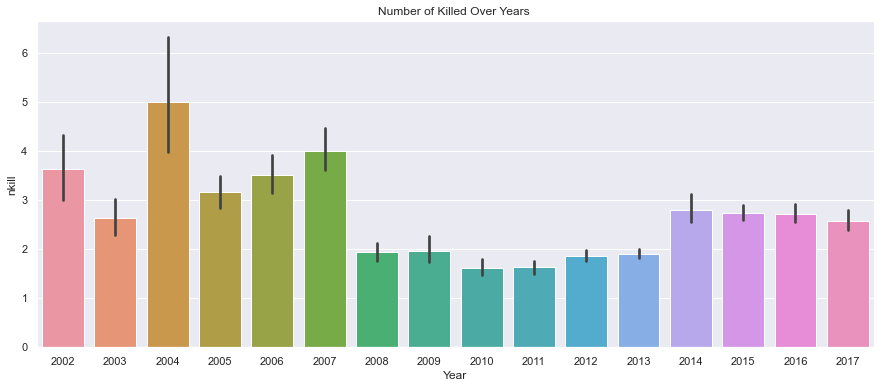

In [51]:
#number of kills 
sns.barplot( x='iyear', y="nkill",data=newdf, order=None,
                ci=95, n_boot=1000,  palette=None, 
                saturation=0.75, errcolor='.26', dodge=True)
sns.color_palette("mako", as_cmap=True)
plt.gcf().set_size_inches(15, 6)
plt.title("Number of Killed Over Years ")
plt.xlabel("Year")
plt.show()

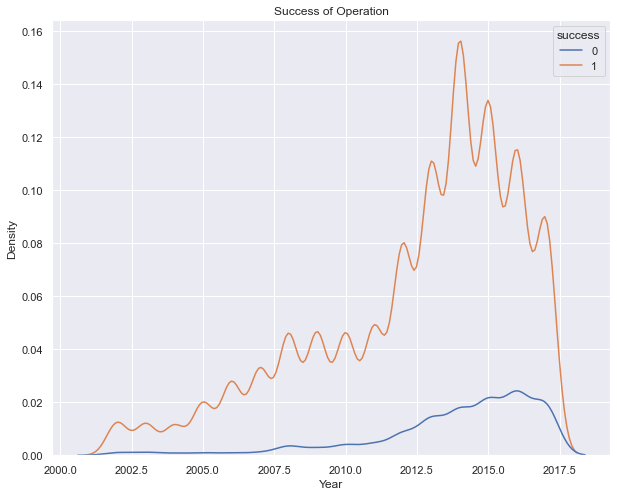

In [52]:
plt.figure(figsize=(10,8))

#plot 1:
#  data


sns.kdeplot(
    data=newdf, 
    x="iyear",
    hue="success"
)
plt.xlabel("Year")
plt.title("Success of Operation");

c:\users\fatoo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\fatoo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


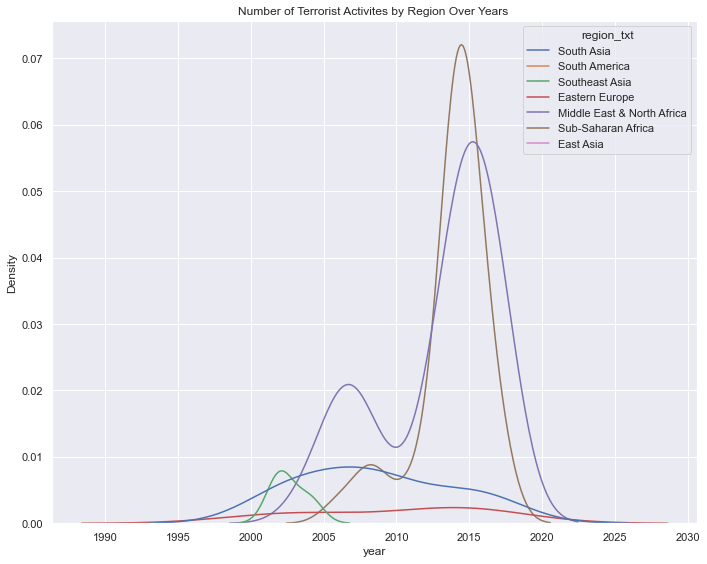

In [61]:

#plot 2:
# data

 # 2x2 plot with plot position 2 (upper right)
plt.figure(figsize=(10,8))
   
sns.kdeplot(
    data=newdf, 
    x="iyear",
    hue="region_txt"
)

plt.title("Number of Terrorist Activites by Region Over Years ");
plt.xlabel("year")

plt.tight_layout() # To increase space between plots to prevent label overlap
plt.show()

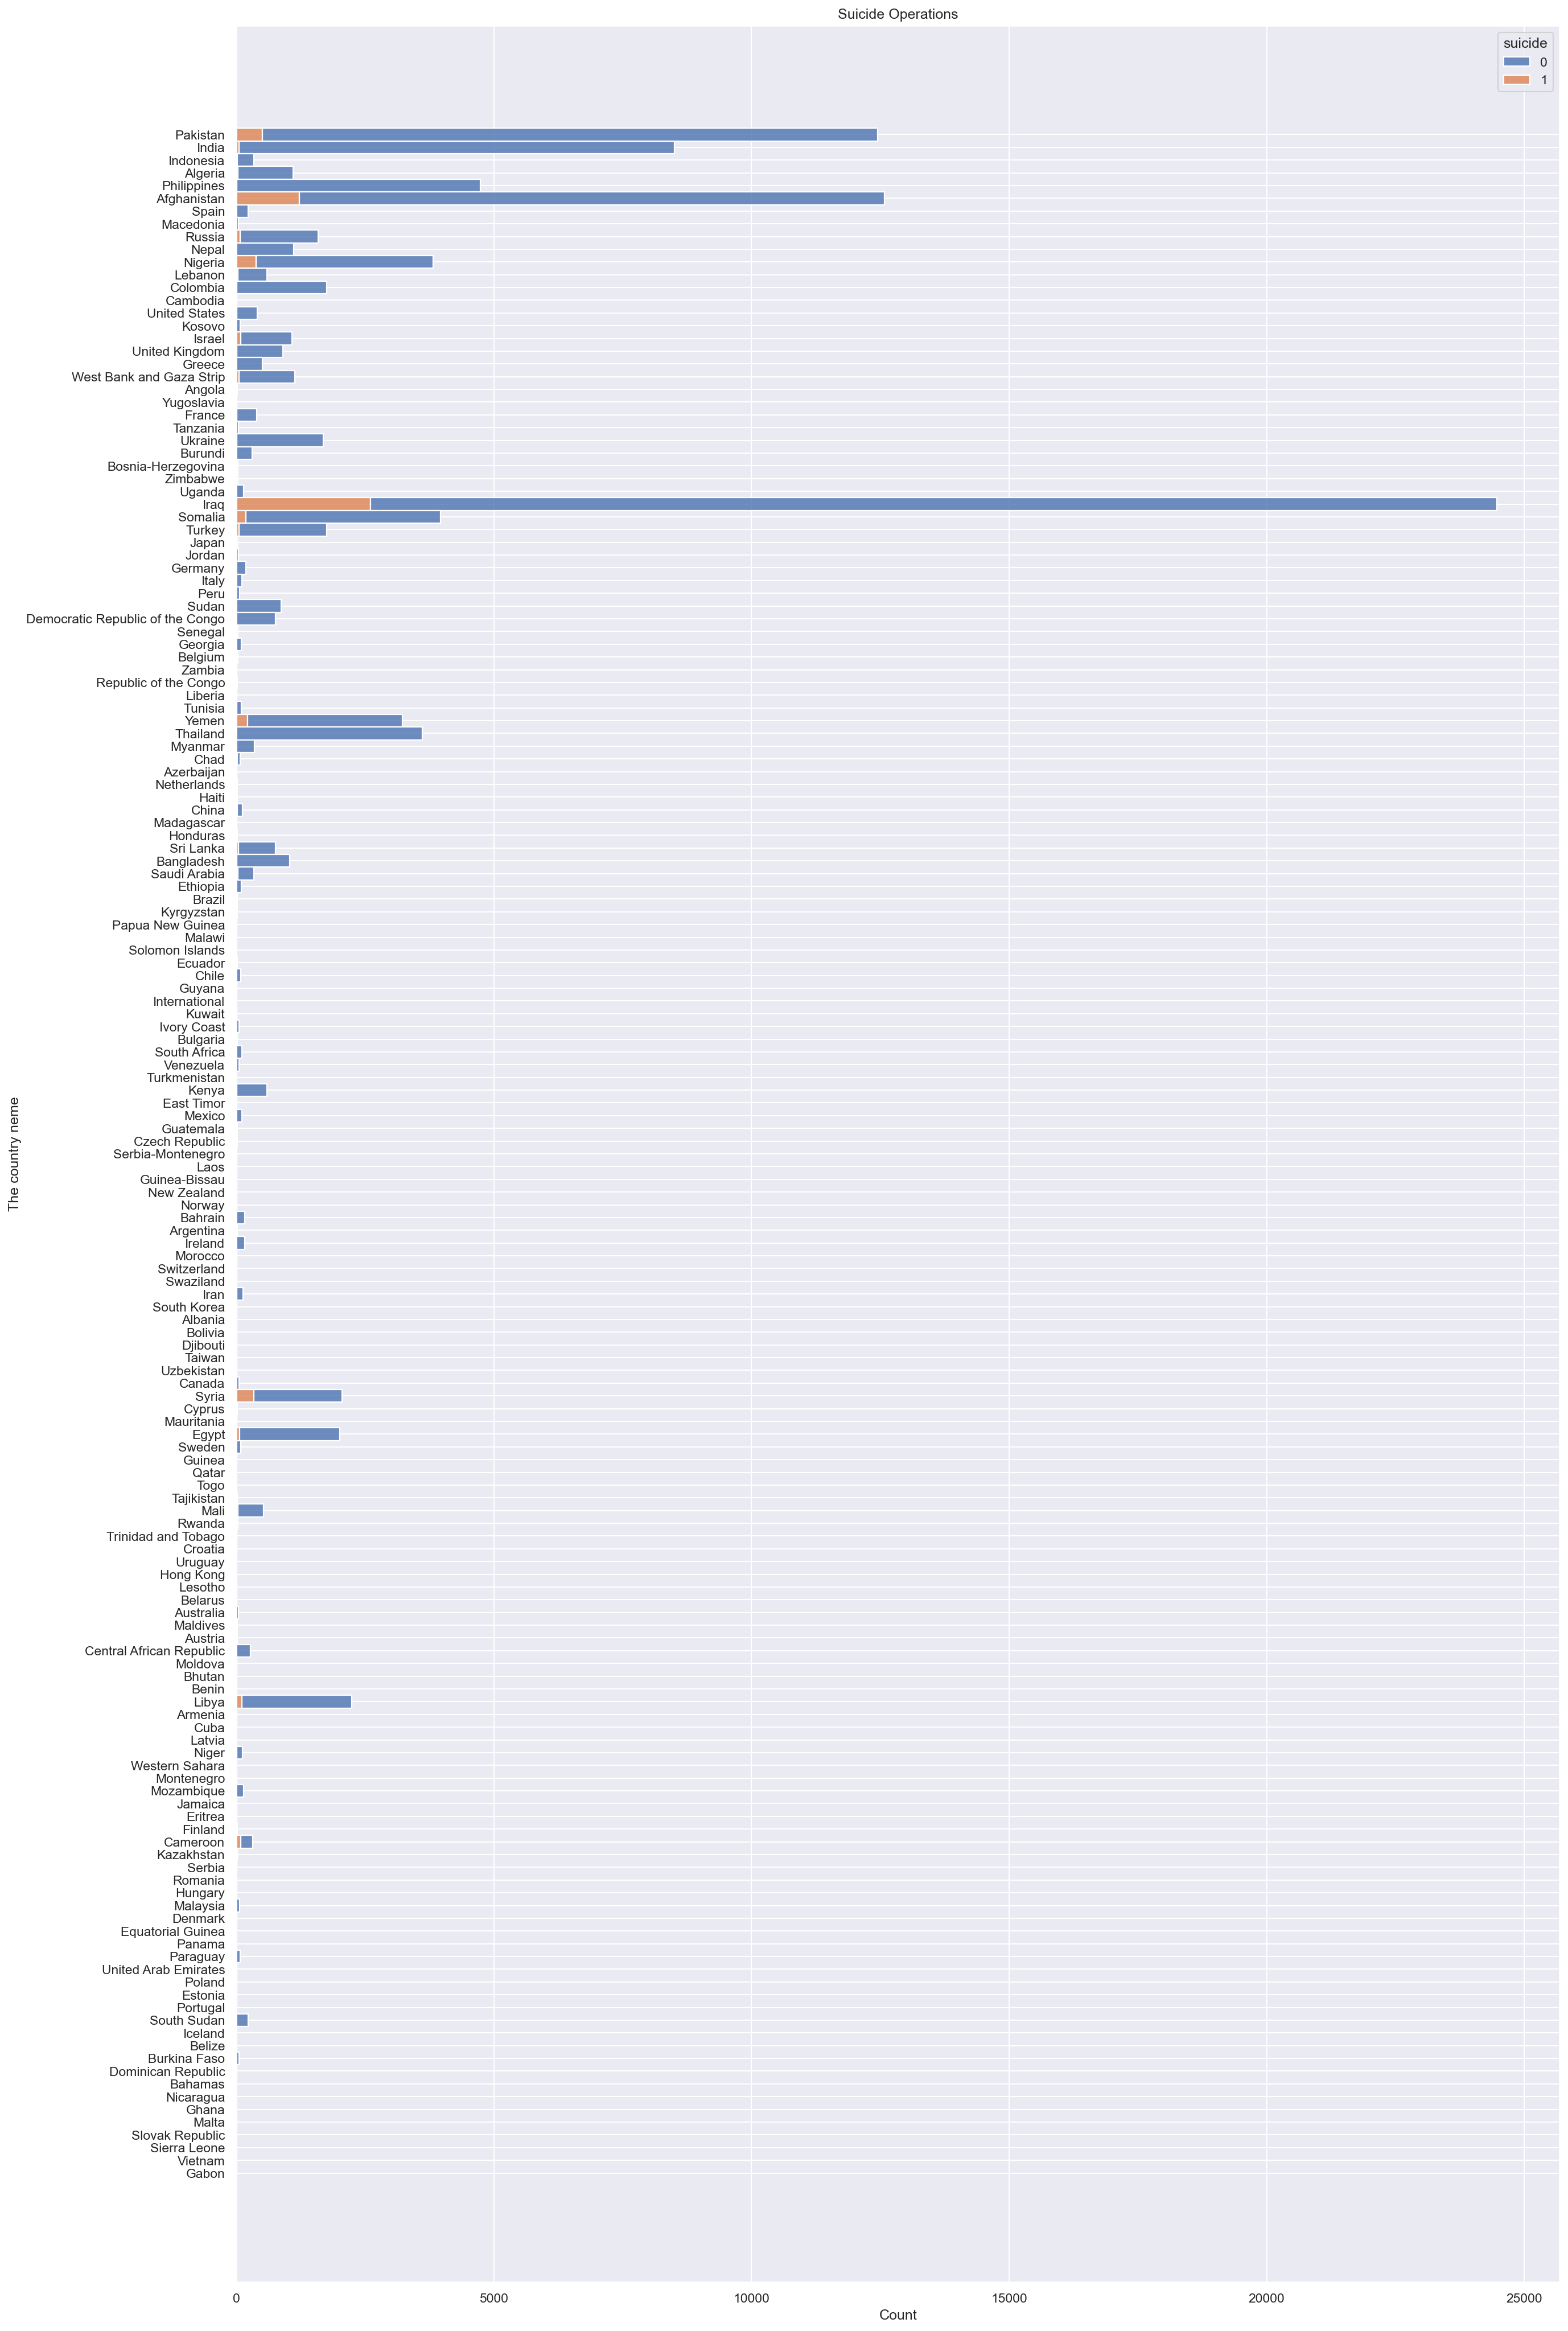

In [54]:
# Stacked Histogram
plt.figure(figsize=(20,35), dpi= 150)

sns.histplot(
    newdf,
    y="country_txt",
    #x = "loan_classification",
    hue="suicide",
    multiple="stack",
    alpha=0.8
   )
plt.ylabel("The country neme");
plt.title("Suicide Operations");

In [55]:
newdf = newdf[newdf['nkill']>100]

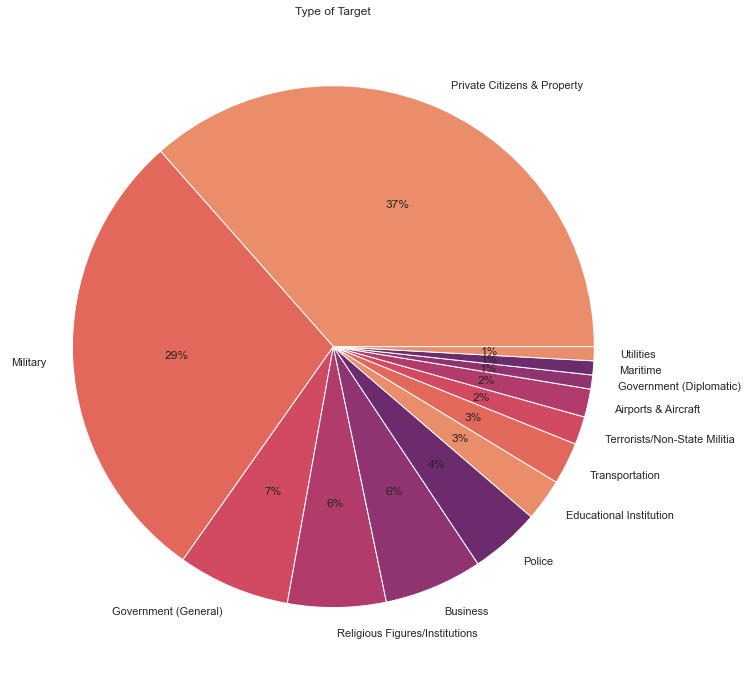

In [56]:
colors = sns.color_palette('flare')
series= newdf["targtype1_txt"].value_counts()
labels = series.index
values = series.values
plt.pie(values, labels = labels,  colors = colors, autopct='%.0f%%')
plt.title("Type of Target")
plt.gcf().set_size_inches(20,12)
plt.show()
#We can see that year 2016 has highest reservations.
#Then 2017 

In [57]:
country_wise=newdf['country_txt'].value_counts().reset_index()
country_wise.rename(columns={"index":'Country Name','country_txt':'Count'},inplace=True)
country_wise

,Country Name,Count
0,Iraq,34
1,Nigeria,16
2,Syria,12
3,Cameroon,6
4,Pakistan,4
5,Afghanistan,4
6,Somalia,4
7,Nepal,4
8,South Sudan,3
9,Ukraine,3


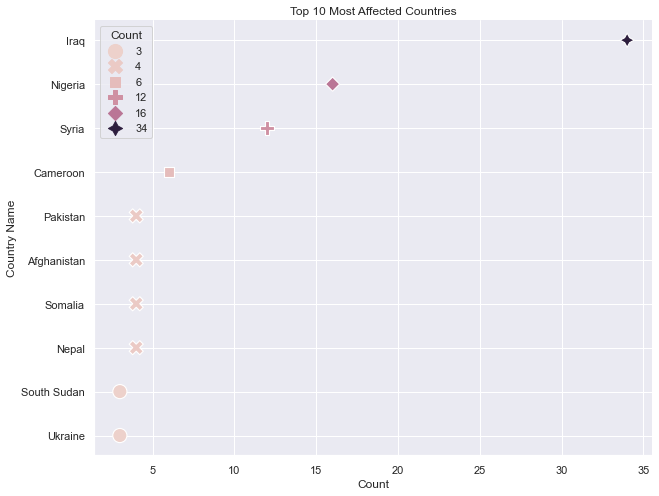

In [58]:
sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
sns.set(rc={"figure.figsize":(10, 8)}) #width=8, height=4

sns.color_palette("pastel") # Set2 , ("husl", 9), ("flare", as_cmap=True)"pastel"
sns.scatterplot(x="Count", y="Country Name",
                data=country_wise[:10],
                size="Count",
                style="Count",
                sizes=(200, 200),
                hue="Count")
plt.title('Top 10 Most Affected Countries')
sns.despine()
plt.show()

c:\users\fatoo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\fatoo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\fatoo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


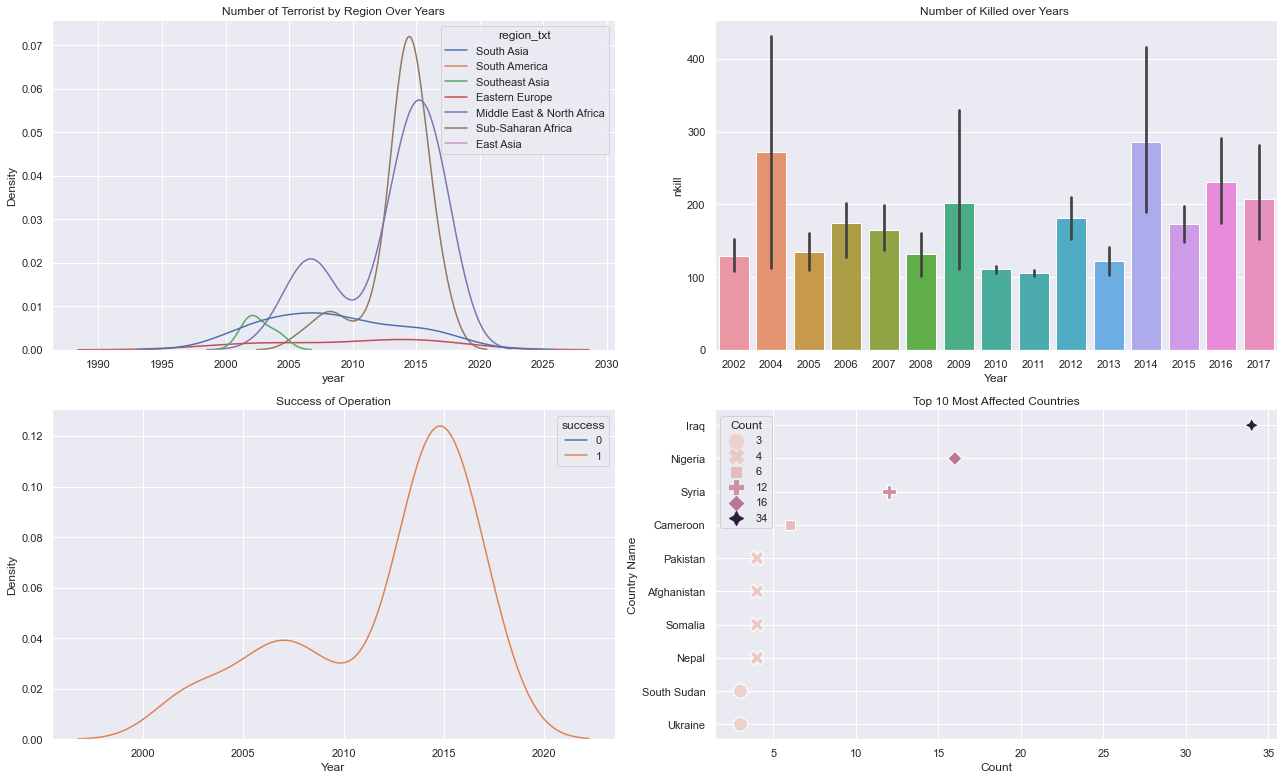

In [62]:
plt.figure(figsize=(18,11))
#plot 1:
plt.subplot(2, 2, 1) # 2x2 plot with plot position 1 (upper left)
   
sns.kdeplot(
    data=newdf, 
    x="iyear",
    hue="region_txt"
)
plt.title("Number of Terrorist by Region Over Years");
plt.xlabel("year")


#plot 2:
plt.subplot(2, 2, 2) # 2x2 plot with plot position 2 (upper right)
sns.barplot( x='iyear', y="nkill",data=newdf, order=None,
                ci=95, n_boot=1000,  palette=None, 
                saturation=0.75, errcolor='.26', dodge=True)
sns.color_palette("mako", as_cmap=True)
plt.title("Number of Killed over Years ")
plt.xlabel("Year")
# plot 3:
plt.subplot(2,2,3) # 2x2 plot with plot position 2 (lower left)

sns.kdeplot(
    data=newdf, 
    x="iyear",
    hue="success"
)
plt.xlabel("Year")
plt.title("Success of Operation");
# plot 4:
plt.subplot(2,2,4) # 2x2 plot with plot position 2 (lower right)
sns.set_theme(style="whitegrid")
sns.set(rc={"figure.figsize":(10, 8)}) #width=8, height=4
sns.color_palette("pastel") # Set2 , ("husl", 9), ("flare", as_cmap=True)"pastel"
sns.scatterplot(x="Count", y="Country Name",
                data=country_wise[:10],
                size="Count",
                style="Count",
                sizes=(200, 200),
                hue="Count")
plt.title('Top 10 Most Affected Countries')
sns.despine()

plt.tight_layout() 
plt.show()